In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve
from tqdm import tqdm
import xgboost as xgb #BDT
import pickle
import mplhep as hep

import pandas as pd
import warnings
warnings.simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

from utils.analysis import Optimization

TAG = "pnetfix"

/home/users/jguiang/apps/miniconda3/envs/analysis/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
babies = sorted(glob.glob(f"../analysis/studies/vbsvvhjets/output_{TAG}/Run2/*.root"))
sig_babies = [baby for baby in babies if "VBS" in baby]
bkg_babies = [baby for baby in babies if "VBS" not in baby and "data" not in baby]
data_babies = [baby for baby in babies if "data" in baby]
print("Signal:")
print("\n".join(sig_babies))
print("Background:")
print("\n".join(bkg_babies))
print("Data:")
print("\n".join(data_babies))

Signal:
../analysis/studies/vbsvvhjets/output_pnetfix/Run2/VBSVVH.root
Background:
../analysis/studies/vbsvvhjets/output_pnetfix/Run2/Bosons.root
../analysis/studies/vbsvvhjets/output_pnetfix/Run2/QCD.root
../analysis/studies/vbsvvhjets/output_pnetfix/Run2/SingleTop.root
../analysis/studies/vbsvvhjets/output_pnetfix/Run2/TT1L.root
../analysis/studies/vbsvvhjets/output_pnetfix/Run2/TTH.root
../analysis/studies/vbsvvhjets/output_pnetfix/Run2/TTHad.root
../analysis/studies/vbsvvhjets/output_pnetfix/Run2/TTW.root
Data:
../analysis/studies/vbsvvhjets/output_pnetfix/Run2/data.root


In [3]:
vbsvvh = Optimization(
    sig_root_files=sig_babies,
    bkg_root_files=bkg_babies,
    data_root_files=data_babies,
    ttree_name="tree",
    weight_columns=[
        "xsec_sf", 
        "pu_sf",
        "prefire_sf"
    ]
)
vbsvvh.df["objsel"] = True
vbsvvh.df["presel"] = vbsvvh.df.eval(
    "objsel and hbbfatjet_xbb > 0.5 and ld_vqqfatjet_xwqq > 0.3 and tr_vqqfatjet_xwqq > 0.3"
)
vbsvvh.make_selection("presel")

bkg_count = vbsvvh.bkg_count()
qcd_count = vbsvvh.sample_count("QCD")
data_count = vbsvvh.data_count()

vbsvvh.df.loc[vbsvvh.df.name == "QCD", "event_weight"] *= (data_count - (bkg_count - qcd_count))/(qcd_count)

Loading data babies: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.73s/it]


In [4]:
# vbsvvh.df["bdt_presel"] = vbsvvh.df.eval(
#     "M_jj > 500 and abs(deta_jj) > 3"
#     + "and hbbfatjet_xbb > 0.5"
#     + "and ld_vqqfatjet_xwqq > 0.5 and tr_vqqfatjet_xwqq > 0.5"
#     + "and ST > 1300"
#     + "and hbbfatjet_mass < 150"
#     + "and ld_vqqfatjet_mass < 120 and tr_vqqfatjet_mass < 120"
# )
vbsvvh.df["bdt_presel"] = vbsvvh.df.eval(
    "ST > 1300"
    + " and hbbfatjet_xbb > 0.5"
    + " and hbbfatjet_mass < 150"
    + " and ld_vqqfatjet_xwqq > 0.5 and tr_vqqfatjet_xwqq > 0.5"
    + " and ld_vqqfatjet_mass < 120 and tr_vqqfatjet_mass < 120"
)
vbsvvh.sig_count(selection="bdt_presel")

8.553445664707994

In [5]:
vbsvvh.bkg_count(selection="bdt_presel")

1591.5173950411775

In [6]:
vbsvvh.make_selection("bdt_presel")
# vbsvvh.set_split_column(ratio=0.6, name="split")

In [7]:
vbsvvh.sample_df("TTHad").event_weight.sum()

80.17808172951575

In [8]:
vbsvvh.sample_df("QCD").event_weight.sum()

1411.5392691904617

In [9]:
vbsvvh.sig_count()

8.553445664707994

In [10]:
print("\n".join(vbsvvh.df.columns))

reweight_c2v_eq_3
HT
n_jets
n_loose_b_jets
n_medium_b_jets
n_tight_b_jets
btag_sf
btag_sf_up
btag_sf_dn
puid_sf
puid_sf_up
puid_sf_dn
HT_fat
n_fatjets
ld_vbsjet_pt
ld_vbsjet_eta
ld_vbsjet_phi
tr_vbsjet_pt
tr_vbsjet_eta
tr_vbsjet_phi
M_jj
pt_jj
eta_jj
phi_jj
deta_jj
abs_deta_jj
dR_jj
xsec_sf
pu_sf
pu_sf_up
pu_sf_dn
prefire_sf
prefire_sf_up
prefire_sf_dn
trig_sf
trig_sf_up
trig_sf_dn
event
year
MET
MET_up
MET_dn
lhe_muF0p5_muR0p5
lhe_muF1p0_muR0p5
lhe_muF2p0_muR0p5
lhe_muF0p5_muR1p0
lhe_muF1p0_muR1p0
lhe_muF2p0_muR1p0
lhe_muF0p5_muR2p0
lhe_muF1p0_muR2p0
lhe_muF2p0_muR2p0
ps_isr2p0_fsr1p0
ps_isr1p0_fsr2p0
ps_isr0p5_fsr1p0
ps_isr1p0_fsr0p5
ld_vqqfatjet_xwqq
ld_vqqfatjet_xvqq
ld_vqqfatjet_pt
ld_vqqfatjet_eta
ld_vqqfatjet_phi
ld_vqqfatjet_mass
ld_vqqfatjet_msoftdrop
tr_vqqfatjet_xwqq
tr_vqqfatjet_xvqq
tr_vqqfatjet_pt
tr_vqqfatjet_eta
tr_vqqfatjet_phi
tr_vqqfatjet_mass
tr_vqqfatjet_msoftdrop
ld_vqqjet_qgl
ld_vqqjet_pt
ld_vqqjet_eta
ld_vqqjet_phi
ld_vqqjet_mass
tr_vqqjet_qgl
tr_vqqjet_pt
tr_vq

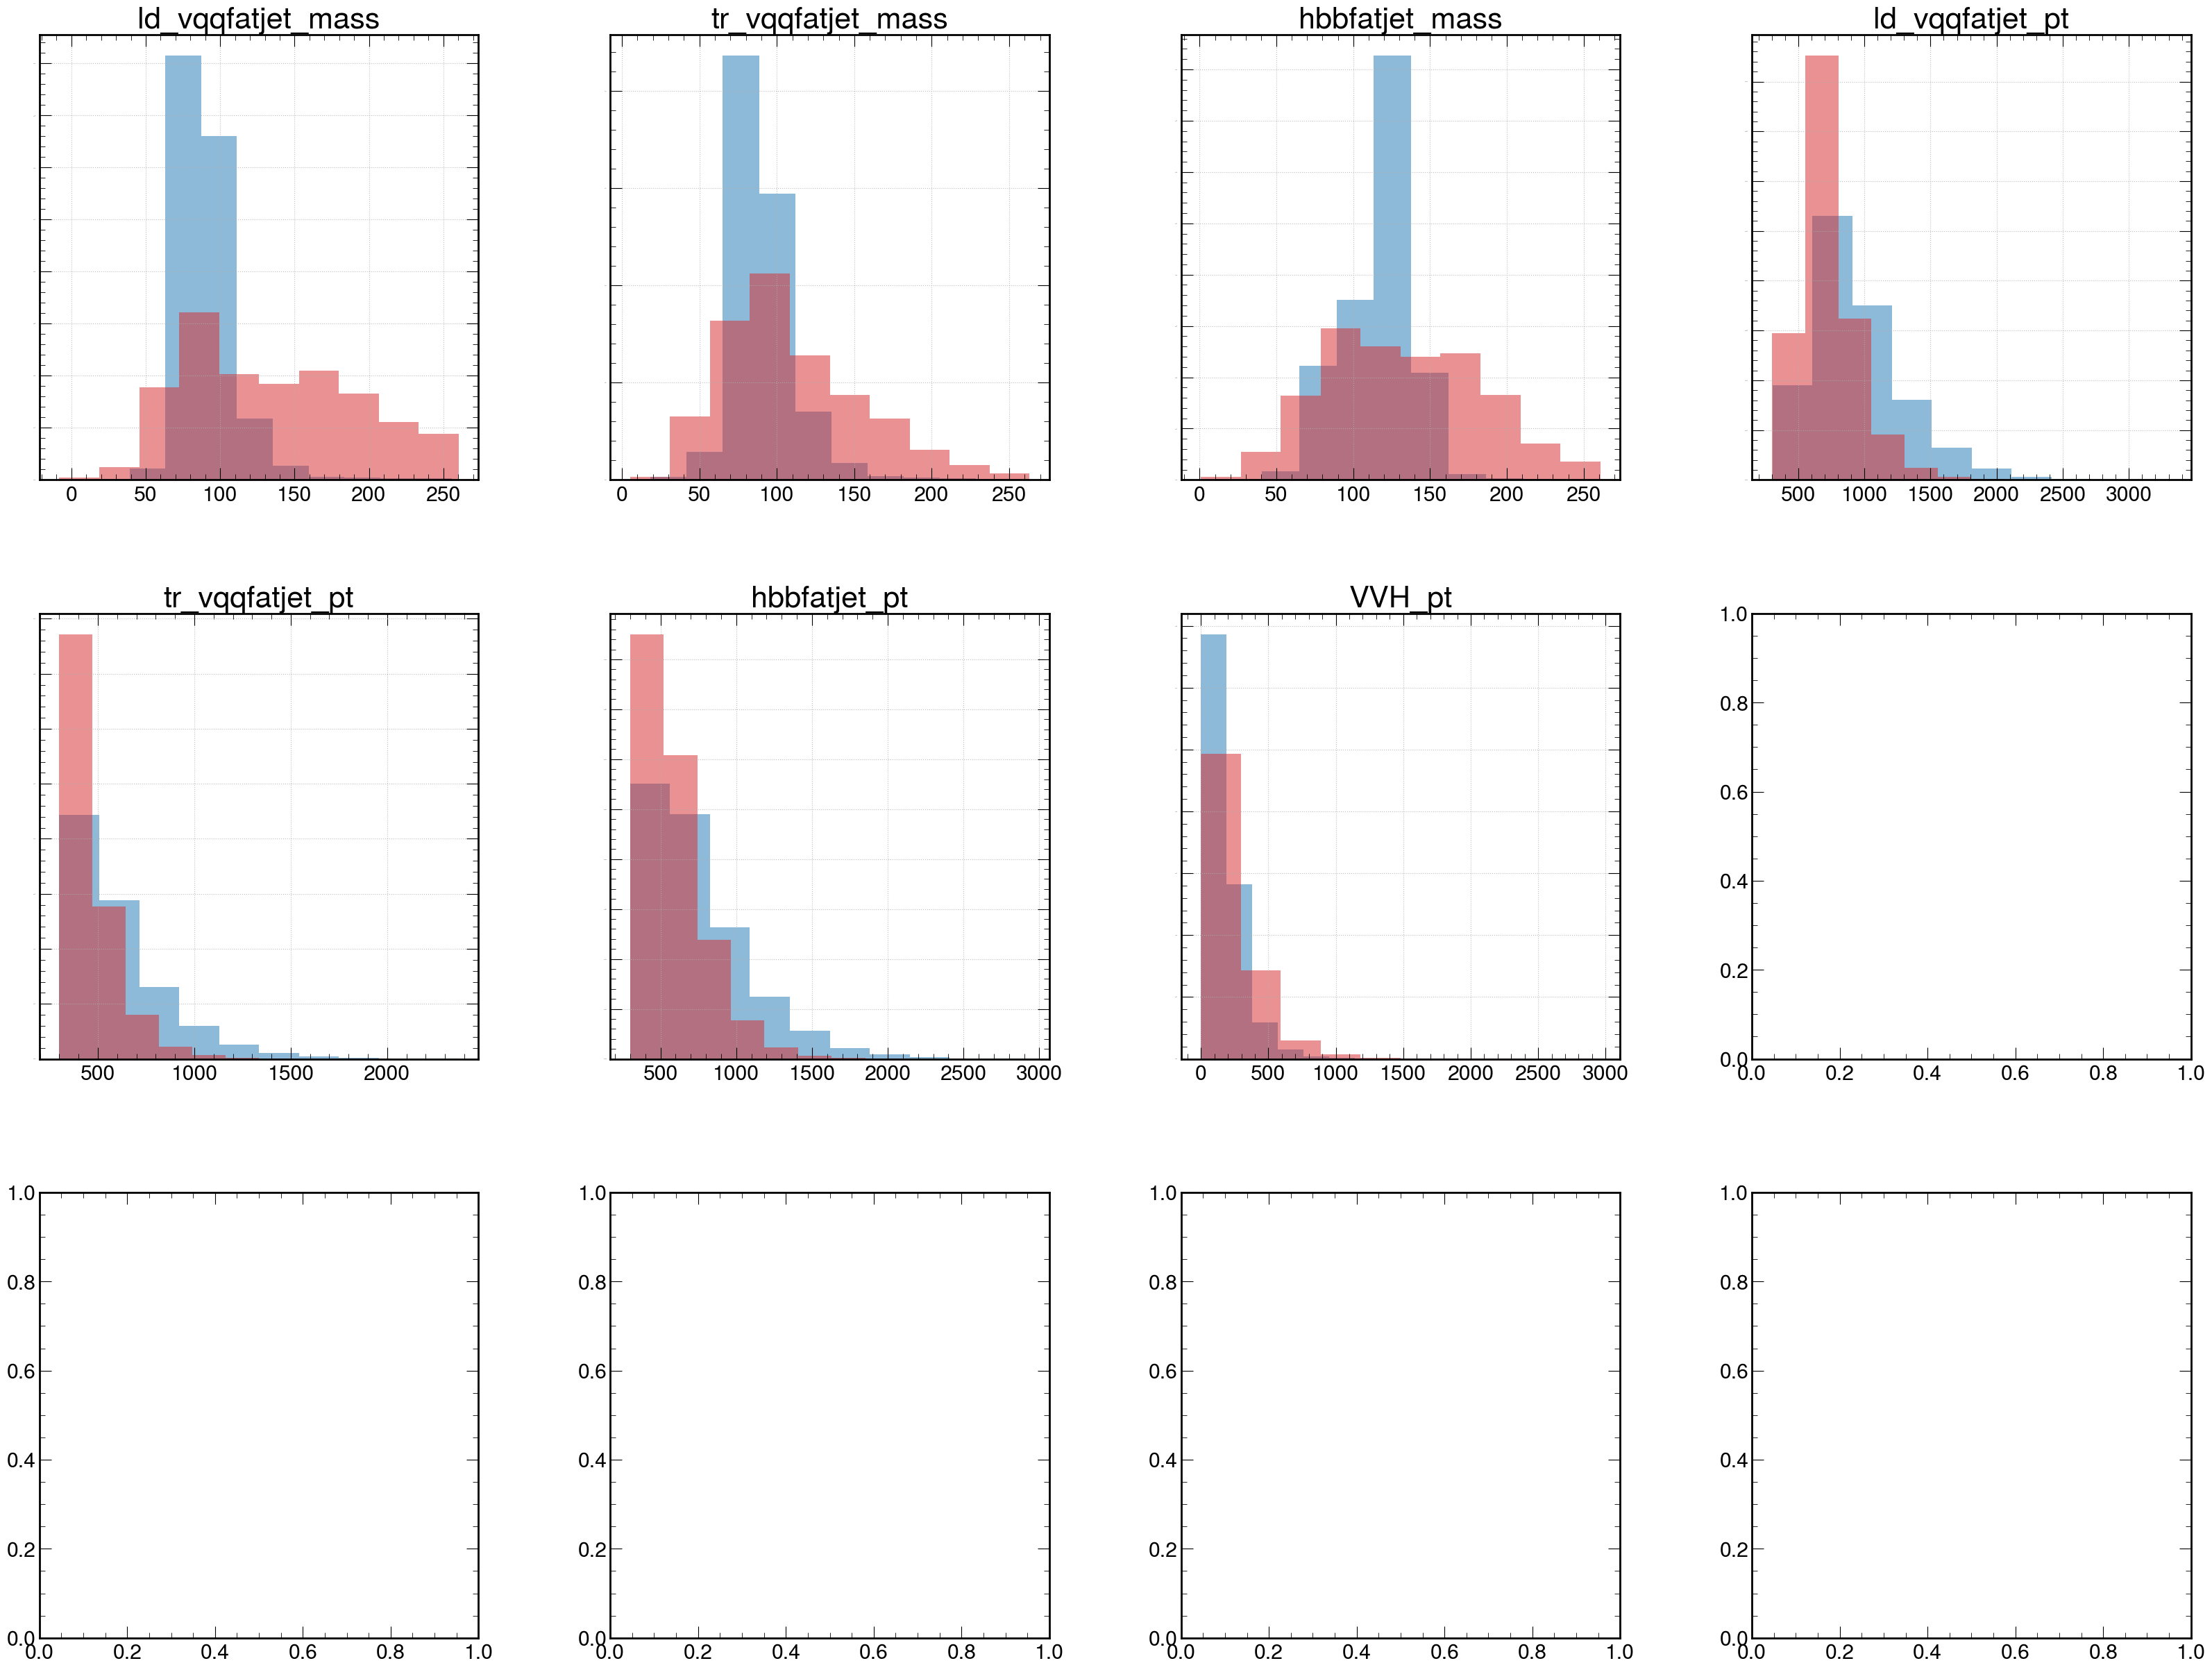

In [4]:
# Select features
features = [
#     "ld_vqqfatjet_score",
#     "tr_vqqfatjet_score",
#     "hbbfatjet_score",
    "ld_vqqfatjet_mass",
    "tr_vqqfatjet_mass",
    "hbbfatjet_mass",
#     "ST",
    "ld_vqqfatjet_pt",
    "tr_vqqfatjet_pt", 
    "hbbfatjet_pt",
    "VVH_pt"
]

# Plot feature shapes
fig, axes = plt.subplots(3,4,figsize=(40,30))

sig_df = vbsvvh.sig_df()
bkg_df = vbsvvh.bkg_df()

ax = sig_df[features].hist(
    ax=axes.flatten()[:len(features)],
    alpha=0.5, color="C0", ylabelsize=0, 
    density=True
)
ax = bkg_df[features].hist(
    ax=axes.flatten()[:len(features)], 
    alpha=0.5, color="C3", ylabelsize=0, 
    density=True
)

In [7]:
vbsvvh.set_split_column(ratio=0.6, name="split")

train_df = vbsvvh.df[vbsvvh.df.split].sample(frac=1.)
test_df = vbsvvh.df[~vbsvvh.df.split].sample(frac=1.)

# BDT input
dtest = xgb.DMatrix(
    test_df[features], 
    label=test_df.is_signal,
    weight=np.abs(test_df.split_weight)
)
dtrain = xgb.DMatrix(
    train_df[features], 
    label=train_df.is_signal, 
    weight=np.abs(train_df.split_weight)
)
evallist = [(dtrain, "train"), (dtest, "eval")]

# BDT parameters setup
params = {}
params["objective"] = "binary:logistic"

# BDT knobs (hyper-parameters)
num_round = 500                  # Number of training rounds
params["eta"] = 0.1              # Step size shrinkage (alias: learning_rate)
params["max_depth"] = 3          # Max. depth of tree: larger = more complex = more prone to overfitting
params["verbosity"] = 1          # 0 (silent), 1 (warning), 2 (info), 3 (debug)
params["nthread"] = 8            # Number of parallel threads
params["eval_metric"] = "auc"    # Evaluation metrics for validation data. 'auc' = Area Under the [ROC] Curve
params["subsample"] = 0.6        # Subsample ratio of the training instances
params["alpha"] = 8.0            # L1 regularization term on weights: Larger = more conservative
params["gamma"] = 2.0            # Min. loss rediction to make leaf (alias: min_split_loss)
params["lambda"] = 1.0           # L2 regularization term on weights: Larger = more conservative
params["min_child_weight"] = 1.0 # Minimum sum of instance weight (hessian) needed in a child
params["colsample_bytree"] = 1.0 # The subsample ratio of columns when constructing each tree
# params["base_score"] = 0.1       # The initial prediction score of all instances, global bias

# Get pos/neg weights
sumw_pos = np.abs(dtrain.get_weight()[dtrain.get_label() == 1]).sum()
sumw_neg = np.abs(dtrain.get_weight()[dtrain.get_label() == 0]).sum()
# Control the balance of positive and negative weights, useful for unbalanced classes
# A typical value to consider: sum(negative instances) / sum(positive instances)
params["scale_pos_weight"] = sumw_neg/sumw_pos

/home/users/jguiang/apps/miniconda3/envs/analysis/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/users/jguiang/apps/miniconda3/envs/analysis/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [8]:
bst = xgb.train(params, dtrain, num_round, evallist, early_stopping_rounds=10, verbose_eval=True)

[0]	train-auc:0.87959	eval-auc:0.87998
[1]	train-auc:0.88514	eval-auc:0.88433
[2]	train-auc:0.90793	eval-auc:0.90472
[3]	train-auc:0.90927	eval-auc:0.90586
[4]	train-auc:0.91009	eval-auc:0.90707
[5]	train-auc:0.92575	eval-auc:0.92160
[6]	train-auc:0.92900	eval-auc:0.92512
[7]	train-auc:0.93449	eval-auc:0.93037
[8]	train-auc:0.94472	eval-auc:0.94176
[9]	train-auc:0.94492	eval-auc:0.94172
[10]	train-auc:0.94712	eval-auc:0.94430
[11]	train-auc:0.95033	eval-auc:0.94739
[12]	train-auc:0.95413	eval-auc:0.95139
[13]	train-auc:0.95855	eval-auc:0.95654
[14]	train-auc:0.96066	eval-auc:0.95907
[15]	train-auc:0.96176	eval-auc:0.95999
[16]	train-auc:0.96183	eval-auc:0.96018
[17]	train-auc:0.96382	eval-auc:0.96252
[18]	train-auc:0.96421	eval-auc:0.96283
[19]	train-auc:0.96519	eval-auc:0.96402
[20]	train-auc:0.96687	eval-auc:0.96569
[21]	train-auc:0.96762	eval-auc:0.96665
[22]	train-auc:0.96855	eval-auc:0.96762
[23]	train-auc:0.96876	eval-auc:0.96783
[24]	train-auc:0.96961	eval-auc:0.96889
[25]	train

[203]	train-auc:0.98079	eval-auc:0.97772
[204]	train-auc:0.98084	eval-auc:0.97772
[205]	train-auc:0.98084	eval-auc:0.97772
[206]	train-auc:0.98086	eval-auc:0.97771
[207]	train-auc:0.98086	eval-auc:0.97770
[208]	train-auc:0.98087	eval-auc:0.97769
[209]	train-auc:0.98090	eval-auc:0.97770
[210]	train-auc:0.98092	eval-auc:0.97769
[211]	train-auc:0.98094	eval-auc:0.97770
[212]	train-auc:0.98097	eval-auc:0.97768
[213]	train-auc:0.98100	eval-auc:0.97772


In [9]:
# Get predictions
preds_train = bst.predict(xgb.DMatrix(train_df[features]))
preds_test = bst.predict(xgb.DMatrix(test_df[features]))

y_train = train_df.is_signal
y_test = test_df.is_signal

/home/users/jguiang/apps/miniconda3/envs/analysis/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/users/jguiang/apps/miniconda3/envs/analysis/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation Preliminary'))

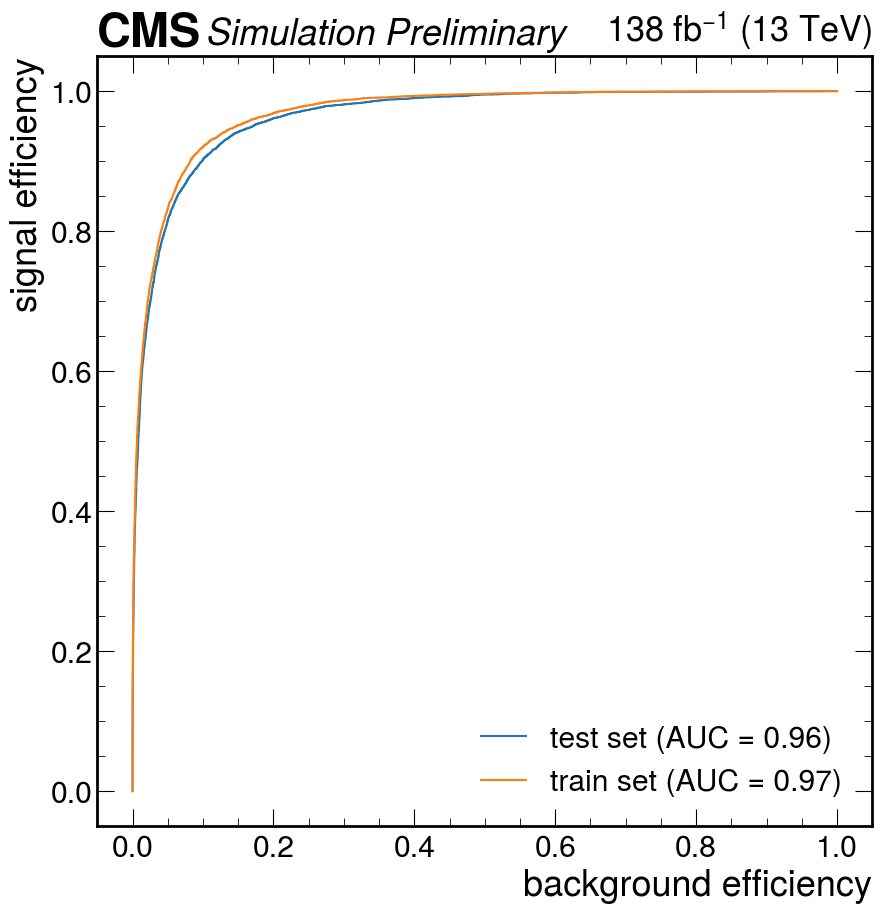

In [10]:
fig, axes = plt.subplots()

# Test ROC Curve
fpr, tpr, thresh = roc_curve(test_df.is_signal, preds_test)
plt.plot(fpr, tpr, label="test set (AUC = {:.2f})".format(np.trapz(tpr,fpr)));

# Train ROC Curve
fpr, tpr, thresh = roc_curve(train_df.is_signal, preds_train)
plt.plot(fpr, tpr, label="train set (AUC = {:.2f})".format(np.trapz(tpr,fpr)));

plt.xlabel("background efficiency");
plt.ylabel("signal efficiency");
plt.legend();

hep.cms.label("Preliminary", data=False, lumi=138, loc=0, ax=axes)

In [11]:
vbsvvh.df["bdt"] = bst.predict(xgb.DMatrix(vbsvvh.df[features]))

/home/users/jguiang/apps/miniconda3/envs/analysis/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


<AxesSubplot:xlabel='BDT Score', ylabel='Events'>

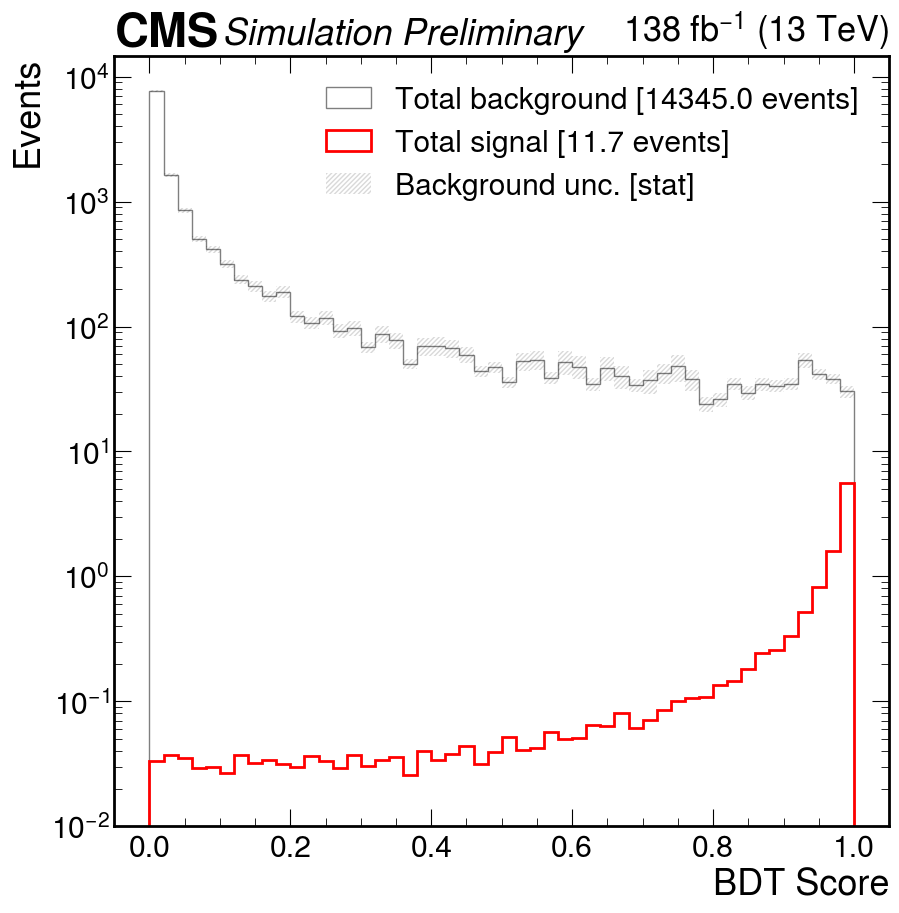

In [12]:
vbsvvh.plot_sig_vs_bkg("bdt", np.linspace(0, 1, 51), x_label="BDT Score", logy=True)

In [19]:
vbsvvh.fom_scan(
    "bdt", [0.8, 0.85, 0.9, 0.91, 0.92, 0.93, 0.94], 
    base_selection="M_jj > 500 and abs(deta_jj) > 3", 
    show_raw=True
)

sel,sig,,bkg,,fom
M_jj > 500 and abs(deta_jj) > 3,7.308340457841181,13268,324.0198006650944,3646,0.40600650834291074
M_jj > 500 and abs(deta_jj) > 3 and bdt > 0.8,5.678539732135915,10134,14.702356825142513,370,1.480959525407067
M_jj > 500 and abs(deta_jj) > 3 and bdt > 0.85,5.32463204666705,9456,11.70115937617647,274,1.5565932910836533
M_jj > 500 and abs(deta_jj) > 3 and bdt > 0.9,4.788027420431923,8466,8.834483377096749,194,1.6108906098064526
M_jj > 500 and abs(deta_jj) > 3 and bdt > 0.91,4.6324543799273705,8186,7.945977107445923,175,1.643378104466743
M_jj > 500 and abs(deta_jj) > 3 and bdt > 0.92,4.464994888066461,7878,7.464436826091676,156,1.6342648599970429
M_jj > 500 and abs(deta_jj) > 3 and bdt > 0.93,4.2581725803315225,7498,7.027489858045959,138,1.6062870028424538
M_jj > 500 and abs(deta_jj) > 3 and bdt > 0.94,4.029324067328798,7081,4.780722394683857,119,1.8428306842449569


In [13]:
for key, val in params.items():
    print(f"{key},{val}")

objective,binary:logistic
eta,0.1
max_depth,3
verbosity,1
nthread,8
eval_metric,auc
subsample,0.6
alpha,8.0
gamma,2.0
lambda,1.0
min_child_weight,1.0
colsample_bytree,1.0
scale_pos_weight,2456.3310546875


In [14]:
# Write features list
with open("../analysis/studies/vbsvvhjets/vbsvvhjets_bdt/bdt_mediumPresel_features.txt", "w") as txt_file:
    txt_file.write("\n".join(features))

# Write BDT model
pickle.dump(bst, open("../analysis/studies/vbsvvhjets/vbsvvhjets_bdt/bdt_mediumPresel.pkl", "wb"))
bst.save_model("../analysis/studies/vbsvvhjets/vbsvvhjets_bdt/bdt_mediumPresel.model")
bst.dump_model(
    "../analysis/studies/vbsvvhjets/vbsvvhjets_bdt/bdt_mediumPresel.json", 
    "../analysis/studies/vbsvvhjets/vbsvvhjets_bdt/bdt_mediumPresel_features.txt"
)